In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [5]:
def stepfunction(t):
    if( t> 0):
        return 1

    return 0

In [7]:
def prediction(X, W, b):
    return stepfunction((np.matmul(X, W) + b)[0])

In [47]:
def perceptronStep(X, y, W, b, learn_rate=0):
    for i in range(len(X)):
        y_pred = prediction(X[i], W,b)
        if y - y_pred == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y - y_pred == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate

    return W, b
            

In [83]:
def trainPerceptronalgo(X, y, learn_rate = 0.1, num_epochs  = 25):
    x_max = max(X.T[0])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines  = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [85]:
data = pd.read_csv('Data.csv')


In [63]:
data

,x,y,label
0,0.78051,-0.069669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [87]:
X = data.loc[:, [ 'x', 'y']]
Y = data.loc[:, 'label']
x = X.values
y = Y.values

In [67]:
print(x.shape)
print(y.shape)

(5, 2)
(5,)


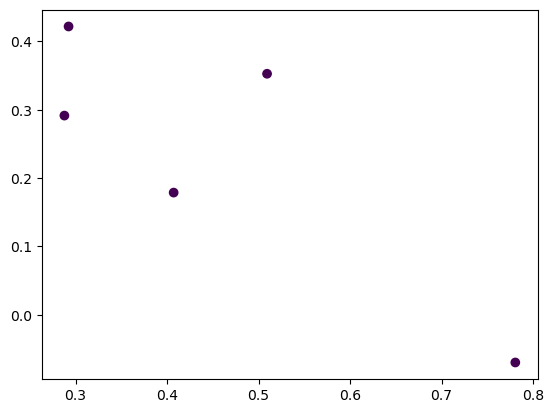

In [89]:
plt.scatter(x[:, 0], x[:, 1], c = y)

In [91]:
result = trainPerceptronalgo(X, y)

KeyError: 0